## The Video Games World Market
__This work is for the online store Ice, which sells video games all over the world. 
User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. 
Let's identify patterns that determine whether a game succeeds or not. This will allow to spot potential big winners and plan advertising campaigns.__

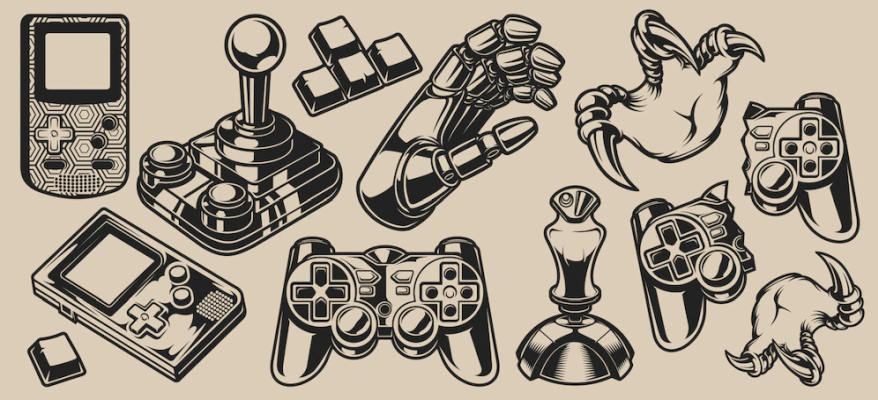

# Index

## [Step 1: General information](#step1)
## [Step 2: Preparing the data](#step2)
## [Step 3: Analyzing the Data](#step3)
## [Step 4: Creating a user profile for each region](#step4)
## [Step 5: Testing the hypotheses](#step5)
## [Step 6: General conclusion](#step6)
## [Bonus: The History and Evolution of the Video Games Market](#bonus)


<a id="step1"></a>



# Step 1 General information

In [1]:
import pandas as pd
import datetime
import re
import math
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats as st 


In [2]:
#avoiding warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
try:
    #games = pd.read_csv('games.csv')
    games = pd.read_csv('/dataset/megaline_calls.csv')
    
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [4]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<a id="step2"></a>


# Step 2: Preparing the data

Let's transform all the headers to lowercase to a avoid confusion in the future analysis:

In [5]:
games.columns = map(str.lower, games.columns)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
na_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
eu_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
jp_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
critic_score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [7]:
#Checking for duplicates
games.duplicated().sum()

0

Let's chek the categorical values in more detail:

In [8]:
games.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
games.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [10]:
games.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [11]:
games.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

The users rating is a numerical column with one value called TBD (to be determined)probably because it is a new game or related to a genre. Let's check it:

In [12]:
games[games['user_score']== 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


In [13]:
games[games['user_score']== 'tbd']['year_of_release'].value_counts()

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: year_of_release, dtype: int64

In [14]:
games[games['user_score']== 'tbd']['genre'].value_counts()

Misc            449
Sports          413
Action          376
Simulation      237
Racing          233
Puzzle          211
Adventure       159
Platform        139
Shooter          99
Fighting         39
Strategy         39
Role-Playing     30
Name: genre, dtype: int64

The tbd is spread in all our data, so it's not connected to the release of the game neither its genre, probably without the minimum scores to make a rating or any other question. 
Anyway, we can not drop these values. Let's try to replace it with a Nan value, because we can not infere any value for this category 
All users scores are representing their opinion about the game, and neither, mean, median could reflect a possible value to this spots.

In [15]:
games['user_score'].replace('tbd',np.nan,inplace=True)

In [16]:
games['user_score'] = pd.to_numeric(games['user_score'], downcast="float")
games['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float32

We have two values in the name and two others in the genre, let's check if there are the same faulty values and if it's possible to replace any of these values:

In [17]:
games[games["genre"].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


This two rows refer to two very old games, both from 1993 from the GEN platform.
Let's drop those lines to clean our data.

In [18]:
games = games.dropna(subset=['name', 'genre'], how='all').reset_index(drop=True)

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: float32(1), float64(6), object(4)
memory usage: 1.3+ MB


Also the column year_of_release is full of null values.
Let's check if there is anyway to replace those values

In [20]:
year_null = games[games["year_of_release"].isnull()]
year_null

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There are 269 missing data values. Let's see if we find how to fill those missing values

In [21]:
year_null['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

In [22]:
games['year_of_release'].isnull().sum()

269

Some games have their release year on their name, so we can try to extract it and put it on our data

In [23]:
# finding years from names string

def year_name(row): 
    year = "\d{4}"
    list = re.findall(year, row) 
    for i in list:
        if 1980 < int(i) < 2016: #min and max year of release
            return i 

games['year'] = games['name'].apply(lambda x: year_name(str(x)))
games['year'].notnull().sum()

793

In [24]:
games['year'].unique()

array([None, '2015', '2004', '2005', '2007', '2003', '2012', '2008',
       '2014', '2002', '2006', '2009', '2013', '2011', '2010', '2000',
       '2001', '1999', '1996'], dtype=object)

In [25]:
def year_replace(row):
    if math.isnan(row['year_of_release']):
        return row['year']
    else:
        return row['year_of_release']
    
games['year_of_release']=games.apply(year_replace,axis=1)
    
    

In [26]:
games['year_of_release'].isnull().sum()

252

In [27]:
games =games.astype({"year_of_release": float})
games.year_of_release.dtype


dtype('float64')

We found 17 new release years, let's try also another check: 

Some games have a release year, but in other platform or versions, so let's try to check the name of the games and the year of release  

In [28]:
games.name.duplicated().sum()

5154

In [29]:
games[(games.name.duplicated())& (games.year_of_release.isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,None
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,None
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T,None
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,None
1130,Call of Duty: Black Ops,PC,NaN,Shooter,0.58,0.81,0.00,0.23,81.0,5.2,M,None
...,...,...,...,...,...,...,...,...,...,...,...,...
16291,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,None
16327,Brothers in Arms: Furious 4,X360,NaN,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,M,None
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,None
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,None


In [30]:
year_not_null = games[games["year_of_release"].notnull()]
year_not_null

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,None
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,None
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,None
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,None
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,None
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2007
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,None
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,None


In [31]:
dup_year = games[(games.name.duplicated())& (games.year_of_release.isnull())]['name'].tolist()


In [32]:
year_dup_names = year_not_null[year_not_null['name'].isin(dup_year)]
year_dup_names

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
32,Call of Duty: Black Ops,X360,2010.0,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,None
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,None
213,Madden NFL 06,PS2,2005.0,Sports,3.98,0.26,0.01,0.66,88.0,8.0,E,None
241,Madden NFL 07,PS2,2006.0,Sports,3.63,0.24,0.01,0.61,84.0,8.2,E,None
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...
14232,WRC: FIA World Rally Championship,PSP,2005.0,Racing,0.02,0.01,0.00,0.00,67.0,7.8,E,None
14530,Freaky Flyers,XB,2003.0,Racing,0.02,0.01,0.00,0.00,64.0,NaN,T,None
14763,Battle vs. Chess,X360,2011.0,Misc,0.00,0.02,0.00,0.00,NaN,NaN,T,None
14887,Madden NFL 07,GBA,2006.0,Sports,0.02,0.01,0.00,0.00,68.0,9.3,E,None


In [33]:
dict_year = dict(zip(year_dup_names.name,year_dup_names.year_of_release))
dict_year

{'Call of Duty: Black Ops': 2010.0,
 'Madden NFL 06': 2005.0,
 'Madden NFL 07': 2006.0,
 'Sonic the Hedgehog': 2006.0,
 'Namco Museum': 2002.0,
 'Street Fighter IV': 2009.0,
 'LEGO Indiana Jones: The Original Adventures': 2008.0,
 'LEGO Batman: The Videogame': 2008.0,
 'Rhythm Heaven': 2008.0,
 'Hitman 2: Silent Assassin': 2003.0,
 'Call of Duty 3': 2006.0,
 'Madden NFL 11': 2010.0,
 'Mario Tennis': 2010.0,
 'BioShock 2': 2010.0,
 'NBA Street Vol. 2': 2003.0,
 'Def Jam: Fight for NY': 2004.0,
 'Wheel of Fortune': 1997.0,
 'Gun': 2005.0,
 'Rocksmith': 2011.0,
 'GRID': 2008.0,
 'Dead Space 3': 2013.0,
 'Street Hoops': 2002.0,
 'Dead Island: Riptide': 2013.0,
 'Tiger Woods PGA Tour 07': 2006.0,
 'Godzilla: Destroy All Monsters Melee': 2002.0,
 'Shrek the Third': 2007.0,
 'Wet': 2009.0,
 'Robotech: Battlecry': 2002.0,
 'Major League Baseball 2K8': 2008.0,
 'Rayman Arena': 2002.0,
 'The Golden Compass': 2007.0,
 'Harvest Moon: The Tale of Two Towns': 2010.0,
 'Pac-Man Fever': 2001.0,
 'Majo

In [34]:
def match_year(name):
    for key, value in dict_year.items():
        if name in key:
            return str(value)


games['year'] = games['name'].apply(match_year)

games['year'].unique()


array([None, '2010.0', '2001.0', '2005.0', '2006.0', '2002.0', '2009.0',
       '2008.0', '2003.0', '2013.0', '2004.0', '1997.0', '2012.0',
       '2011.0', '2007.0', '1999.0'], dtype=object)

In [35]:
def year_replace1(row):
    if math.isnan(row['year_of_release']):
        return row['year']
    else:
        return row['year_of_release']
    
games['year_of_release']=games.apply(year_replace1,axis=1)
games =games.astype({"year_of_release": float})    
    

In [36]:
games['year_of_release'].isnull().sum()

159

We replaced almost 100 values this time, but are still missing around 160 years of release. So now let's use a more general approach, grouping by platform and applying the median in each of them. That's less accurate that the previous, but will give us values inside the range of the of possible years of release


In [37]:
year_not_null = games[games["year_of_release"].notnull()]

In [38]:
year_not_null.groupby(['platform'])['year_of_release'].agg(['min', 'max', 'median']).reset_index()

,platform,min,max,median
0,2600,1980.0,2008.0,1982.0
1,3DO,1994.0,1995.0,1995.0
2,3DS,2010.0,2016.0,2013.0
3,DC,1998.0,2008.0,2000.0
4,DS,1985.0,2013.0,2008.0
5,GB,1988.0,2001.0,1997.0
6,GBA,2000.0,2007.0,2003.0
7,GC,2001.0,2007.0,2003.0
8,GEN,1990.0,1994.0,1993.0
9,GG,1992.0,1992.0,1992.0


In [39]:
games['year_of_release'] = games.groupby(['platform'])['year_of_release']\
.transform(lambda grp: grp.fillna(grp.median()))
games['year_of_release'].isnull().sum()

0

In [40]:
games =games.astype({"year_of_release": float})

In [41]:
#Replacing the Nan of the rating column:
games['rating'].replace(np.nan,'undef',inplace=True)

In [42]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float32
 10  rating           16713 non-null  object 
 11  year             281 non-null    object 
dtypes: float32(1), float64(6), object(5)
memory usage: 1.5+ MB


So we have all table clean, with no missing values in general, and only missing values in the critic score, user score, and rating.

### Creating a Total Sales column

In [43]:
games['total_sales']=games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
13179,TrackMania Turbo: Build to Race,DS,2010.0,Racing,0.02,0.02,0.00,0.00,NaN,NaN,undef,None,0.04
14314,Trine 2,WiiU,2012.0,Platform,0.00,0.03,0.00,0.00,NaN,NaN,undef,None,0.03
7384,Summoner 2,PS2,2002.0,Role-Playing,0.10,0.08,0.00,0.03,76.0,8.3,T,None,0.21
11136,Crimson Sea,XB,2002.0,Action,0.04,0.01,0.04,0.00,78.0,8.2,T,None,0.09
6540,Drakan: The Ancients' Gates,PS2,2002.0,Adventure,0.13,0.10,0.00,0.03,78.0,9.0,M,None,0.26


<a id="step3"></a>



# Step 3: Analyzing the Data

In [44]:
def explore(df,column):
    
    print("")
    print(column)
    print("")
    
    print(df[column].describe())
    print("")
    
    df.hist(column, figsize=(5,4), alpha = 0.7)
    plt.xlabel(column)
    plt.ylabel("games")
    plt.show()
       
        
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr=Q1-1.5*IQR
    max_iqr=Q3+1.5*IQR
    
      
    
    print("")
    print('min border:',min_iqr)
    print('max border:',max_iqr)
    print("")
    print("*******************************************")
    print("")

**Let's look at how many games were released in different years:**


year_of_release

count    16713.000000
mean      2006.474182
std          5.894411
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64



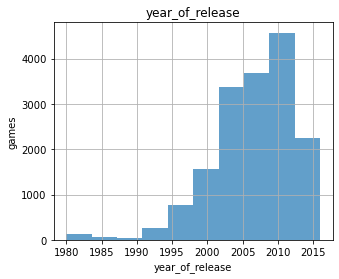


min border: 1992.5
max border: 2020.5

*******************************************



In [45]:
explore(games,'year_of_release')

 75% of the data are above the year 2003, and also around 2003 there were more thank 3000 games released in a year, so that's a good indication of a relevant year to start our study.

**Let's check how sales varied from platform to platform**

In [46]:
age = games.groupby(['platform'])['year_of_release'].agg(['min', 'max']).reset_index().sort_values('max')
age['duration']=age['max']-age['min']
age.sort_values('duration').reset_index(drop=True)

,platform,min,max,duration
0,GG,1992.0,1992.0,0.0
1,TG16,1995.0,1995.0,0.0
2,PCFX,1996.0,1996.0,0.0
3,SCD,1993.0,1994.0,1.0
4,3DO,1994.0,1995.0,1.0
5,WS,1999.0,2001.0,2.0
6,PS4,2013.0,2016.0,3.0
7,XOne,2013.0,2016.0,3.0
8,NG,1993.0,1996.0,3.0
9,WiiU,2012.0,2016.0,4.0


**It's time to choose the platforms with the greatest total sales**

In [47]:
plat_sales_year = games.groupby(['platform'])['total_sales'].sum().reset_index().sort_values('total_sales', ascending = True)
plat_sales_year.reset_index(drop=True)


,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


In [48]:
by_platform = age.merge(plat_sales_year, on='platform').sort_values('total_sales').reset_index(drop=True)
by_platform

,platform,min,max,duration,total_sales
0,PCFX,1996.0,1996.0,0.0,0.03
1,GG,1992.0,1992.0,0.0,0.04
2,3DO,1994.0,1995.0,1.0,0.10
3,TG16,1995.0,1995.0,0.0,0.16
4,WS,1999.0,2001.0,2.0,1.42
5,NG,1993.0,1996.0,3.0,1.44
6,SCD,1993.0,1994.0,1.0,1.86
7,DC,1998.0,2008.0,10.0,15.95
8,GEN,1990.0,1994.0,4.0,28.35
9,SAT,1994.0,1999.0,5.0,33.59


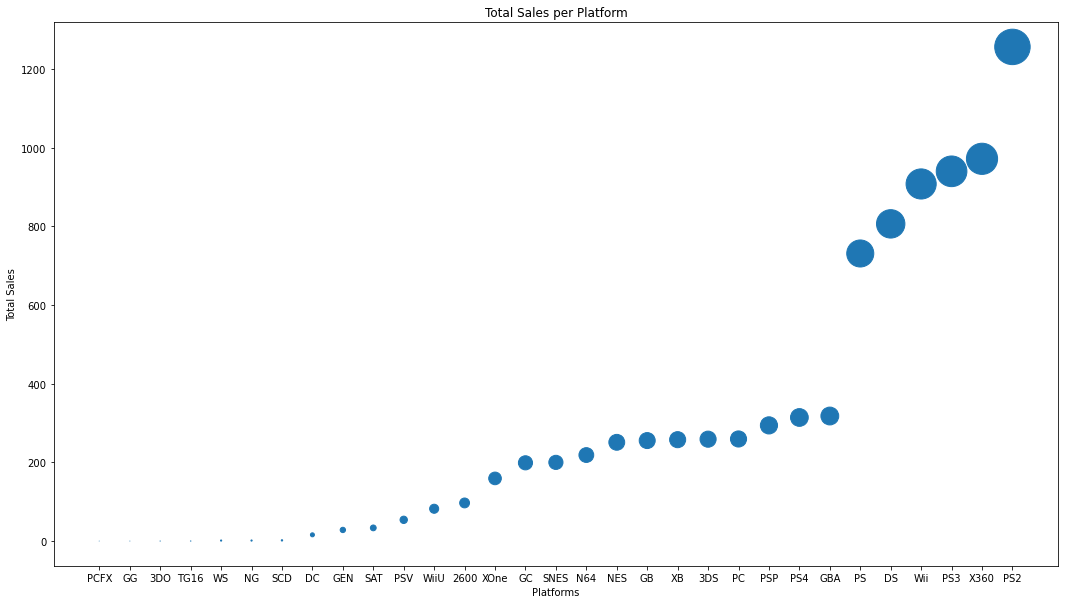

In [49]:

#plat_sales_year.plot.scatter(figsize=(18,10),  x = 'platform', y = 'total_sales', s = 'total_sales')
plt.figure(figsize=(18, 10))
plt.scatter( x = plat_sales_year['platform'], y = plat_sales_year['total_sales'], s = plat_sales_year['total_sales'])
plt.title('Total Sales per Platform')
plt.xlabel("Platforms")
plt.ylabel("Total Sales")
plt.show()


Considering all the years in our database, the top five platforms by total sales are PS2, X360, PS3, Wii and DS, with more than 800 milion in sales

**Now, let's Choose the platforms with the greatest total sales and build a distribution based on data for each year**

In [50]:
#Let's create four datasets for our to selling platforms (with more than 900 million in sales)
ps2 = games[games["platform"]== 'PS2']
x360 = games[games["platform"]== 'X360']
ps3 = games[games["platform"]== 'PS3']
wii = games[games["platform"]== 'Wii']


In [51]:
ps2 = ps2.groupby(['year_of_release'])['total_sales'].sum().reset_index().sort_values('year_of_release', ascending = True)
ps2

,year_of_release,total_sales
0,1997.0,0.95
1,2000.0,39.17
2,2001.0,166.43
3,2002.0,205.38
4,2003.0,185.93
5,2004.0,220.55
6,2005.0,168.39
7,2006.0,106.48
8,2007.0,76.10
9,2008.0,53.90


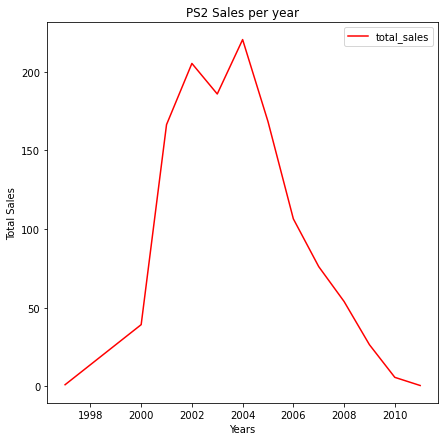

In [52]:
ps2.plot(figsize=(7,7),  x = 'year_of_release', y = 'total_sales', color = 'red')
#plt.plot(x = 'year_of_release', y = 'total_sales', '-o')
plt.title('PS2 Sales per year')
plt.xlabel("Years")
plt.ylabel("Total Sales")
plt.show()


In [53]:
x360 = x360.groupby(['year_of_release'])['total_sales'].sum().reset_index().sort_values('year_of_release', ascending = True)
x360

,year_of_release,total_sales
0,2005.0,9.22
1,2006.0,51.62
2,2007.0,95.42
3,2008.0,135.26
4,2009.0,120.79
5,2010.0,176.66
6,2011.0,144.93
7,2012.0,100.72
8,2013.0,88.58
9,2014.0,34.74


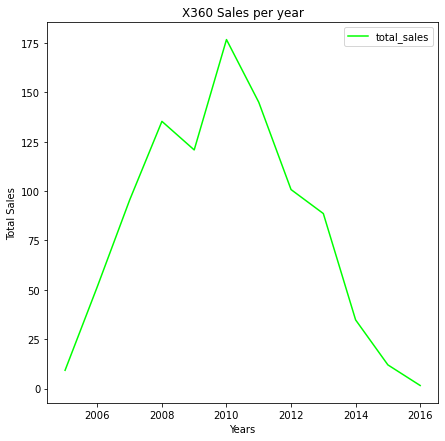

In [54]:
x360.plot(figsize=(7,7),  x = 'year_of_release', y = 'total_sales' , color = '#00FF00')
#plt.plot(x = 'year_of_release', y = 'total_sales', '-o')
plt.title('X360 Sales per year')
plt.xlabel("Years")
plt.ylabel("Total Sales")
plt.show()


In [55]:
ps3 = ps3.groupby(['year_of_release'])['total_sales'].sum().reset_index().sort_values('year_of_release', ascending = True)
ps3

,year_of_release,total_sales
0,2005.0,0.19
1,2006.0,21.44
2,2007.0,73.19
3,2008.0,118.79
4,2009.0,130.93
5,2010.0,142.83
6,2011.0,162.57
7,2012.0,108.28
8,2013.0,113.25
9,2014.0,47.76


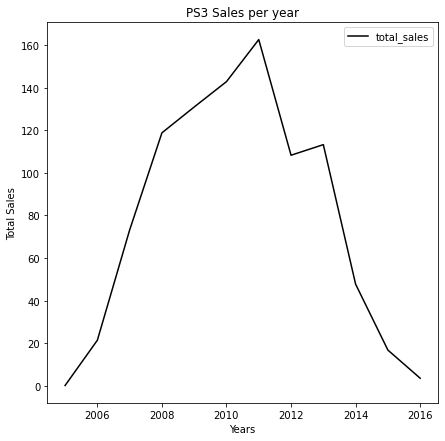

In [56]:
ps3.plot(figsize=(7,7),  x = 'year_of_release', y = 'total_sales', color = 'black')
plt.title('PS3 Sales per year')
plt.xlabel("Years")
plt.ylabel("Total Sales")
plt.show()


In [57]:
wii = wii.groupby(['year_of_release'])['total_sales'].sum().reset_index().sort_values('year_of_release', ascending = True)
wii

,year_of_release,total_sales
0,2006.0,139.86
1,2007.0,153.38
2,2008.0,177.68
3,2009.0,211.53
4,2010.0,128.67
5,2011.0,59.79
6,2012.0,22.94
7,2013.0,8.59
8,2014.0,3.75
9,2015.0,1.14


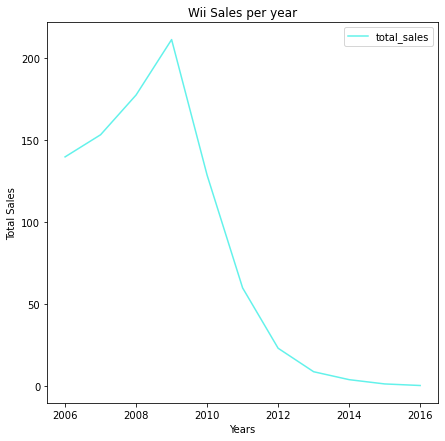

In [58]:
wii.plot(figsize=(7,7),  x = 'year_of_release', y = 'total_sales', color = '#63f2eb')
plt.title('Wii Sales per year')
plt.xlabel("Years")
plt.ylabel("Total Sales")
plt.show()


In general the platforms are showing a period around 4 years to get a peak of sales, if some short fall and rise, to start a continuous descendant till close to zero sales in around 10 years

**How long does it generally take for new platforms to appear and old ones to fade?**

In [59]:
zero = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().sort_values('total_sales')
zero[(zero['year_of_release']>2007)& (zero['total_sales']<0.3)].head()

,platform,year_of_release,total_sales
26,DC,2008.0,0.04
173,PSP,2015.0,0.12
212,Wii,2016.0,0.18
238,XB,2008.0,0.18
172,PSP,2014.0,0.24


In [60]:
zero_list = zero.platform[(zero['year_of_release']>2007)& (zero['total_sales']<0.3)].unique()
zero_list

array(['DC', 'PSP', 'Wii', 'XB'], dtype=object)

In [61]:
by_platform[by_platform['platform'].isin(zero_list)]

,platform,min,max,duration,total_sales
7,DC,1998.0,2008.0,10.0,15.95
19,XB,2000.0,2008.0,8.0,257.74
22,PSP,2004.0,2015.0,11.0,294.05
27,Wii,2006.0,2016.0,10.0,907.51


In [62]:
game_zero = zero[zero['platform'].isin(zero_list)].sort_values('platform')
game_zero

,platform,year_of_release,total_sales
25,DC,2007.0,0.02
26,DC,2008.0,0.04
24,DC,2002.0,0.29
22,DC,2000.0,5.99
23,DC,2001.0,1.07
21,DC,1999.0,5.16
20,DC,1998.0,3.38
169,PSP,2011.0,17.82
167,PSP,2009.0,39.06
163,PSP,2005.0,43.84


There are three good examples of Successful platforms that are now fading down : PSP - XBox - Wii

In [63]:
#Limiting the data to values from 2013
games_new=games[games['year_of_release']>2012].reset_index(drop=True)
games_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,None,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,None,16.27
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undef,None,14.63
3,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undef,None,14.60
4,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,None,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undef,None,0.01
2239,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,undef,None,0.01
2240,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,undef,None,0.01
2241,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undef,None,0.01


In [64]:
psp = games[games["platform"]== 'PSP']
psp = psp.groupby(['year_of_release'])['total_sales'].sum().reset_index().sort_values('year_of_release', ascending = True)
xb = games[games["platform"]== 'XB']
xb = xb.groupby(['year_of_release'])['total_sales'].sum().reset_index().sort_values('year_of_release', ascending = True)
wii = games[games["platform"]== 'Wii']
wii = wii.groupby(['year_of_release'])['total_sales'].sum().reset_index().sort_values('year_of_release', ascending = True)

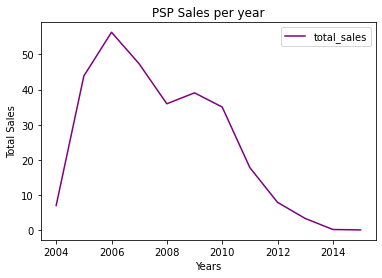

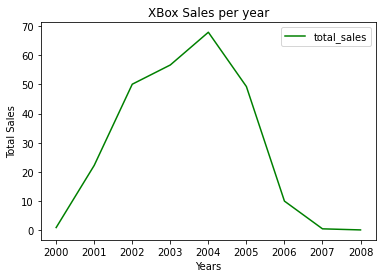

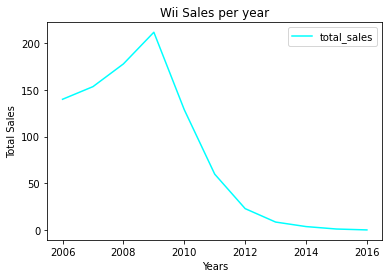

In [65]:
psp.plot(x = 'year_of_release', y = 'total_sales', color = 'purple')
plt.title('PSP Sales per year')
plt.xlabel("Years")
plt.ylabel("Total Sales")
plt.show()
xb.plot(x = 'year_of_release', y = 'total_sales', color = 'green')
plt.title('XBox Sales per year')
plt.xlabel("Years")
plt.ylabel("Total Sales")
plt.show()
wii.plot(x = 'year_of_release', y = 'total_sales', color='cyan')
plt.title('Wii Sales per year')
plt.xlabel("Years")
plt.ylabel("Total Sales")
plt.show()

In [66]:
#platforms that were actives in 2013
by_platform_new = by_platform[(by_platform['min']>2013)|(by_platform['max']>2013)].reset_index(drop=True)
by_platform_new.sort_values('min')

,platform,min,max,duration,total_sales
4,PC,1985.0,2016.0,31.0,259.52
5,PSP,2004.0,2015.0,11.0,294.05
8,PS3,2005.0,2016.0,11.0,939.65
9,X360,2005.0,2016.0,11.0,971.42
7,Wii,2006.0,2016.0,10.0,907.51
3,3DS,2010.0,2016.0,6.0,259.00
0,PSV,2011.0,2016.0,5.0,54.07
1,WiiU,2012.0,2016.0,4.0,82.19
2,XOne,2013.0,2016.0,3.0,159.32
6,PS4,2013.0,2016.0,3.0,314.14



duration

count    10.000000
mean      9.500000
std       8.276473
min       3.000000
25%       4.250000
50%       8.000000
75%      11.000000
max      31.000000
Name: duration, dtype: float64



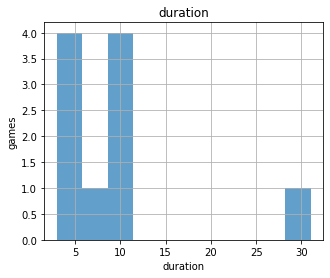


min border: -5.875
max border: 21.125

*******************************************



In [67]:
explore(by_platform_new,'duration')

In [68]:
by_platform_clean = by_platform_new[by_platform_new['duration']<19]
by_platform_clean['duration'].describe()

count     9.000000
mean      7.111111
std       3.586239
min       3.000000
25%       4.000000
50%       6.000000
75%      11.000000
max      11.000000
Name: duration, dtype: float64

# Platforms Life cycle
Considering the active platforms from 2013 until 2016 we can see that the life of one platform is around 8 years when we exclude long life platforms as the PC that has more than 31 years of duration.
The data is also showing that the companies are already working with these values, if we look at the PS2, PS3 and PS4 launch dates, we can see that sey are 8 years apart from one another. The same happened with the X360 to the XOne



**Let's determine what period will be relevant to help to build a prognosis for 2017.**

### Period of Interest
The release of the games is very different from the begining of the video games till today.  To get a relevant sample to make a real prognosis, we have to concentrate in games and platforms that were or are active and had a similar rate of release of games.
Looking at the data, 75% of the dates are after 2003, and also from 2003 there were more than 3000 games released in a year, and growing since then.
Even understanding that the life of a platform is around 8 years, I believe that a larger period for our study could be from 2003 to 2016 to get the basis to our prognosis to 2017

In [69]:
games_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,None,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,None,16.27
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undef,None,14.63
3,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undef,None,14.60
4,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,None,12.62


**Which platforms are leading in sales? Which ones are growing or shrinking? what are potentially profitable platforms?**

In [70]:
plat_sales_new = games_new.groupby(['platform'])['total_sales'].sum().reset_index().sort_values('total_sales', ascending = False)
plat_sales_new.reset_index(drop=True)

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.72
4,X360,136.80
5,WiiU,64.63
6,PC,40.06
7,PSV,33.25
8,Wii,13.66
9,PSP,3.74


In [71]:
by_platform_new = plat_sales_new.merge(age, on='platform').sort_values('total_sales', ascending = False).reset_index(drop=True)
by_platform_new

,platform,total_sales,min,max,duration
0,PS4,314.14,2013.0,2016.0,3.0
1,PS3,181.43,2005.0,2016.0,11.0
2,XOne,159.32,2013.0,2016.0,3.0
3,3DS,143.72,2010.0,2016.0,6.0
4,X360,136.80,2005.0,2016.0,11.0
5,WiiU,64.63,2012.0,2016.0,4.0
6,PC,40.06,1985.0,2016.0,31.0
7,PSV,33.25,2011.0,2016.0,5.0
8,Wii,13.66,2006.0,2016.0,10.0
9,PSP,3.74,2004.0,2015.0,11.0


In [72]:
growth=pd.pivot_table(games_new,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
growth.tail()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013.0,57.04,1.54,13.01,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,0.00,13.28,47.76,100.00,0.24,12.16,3.75,22.03,34.74,54.07
2015.0,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


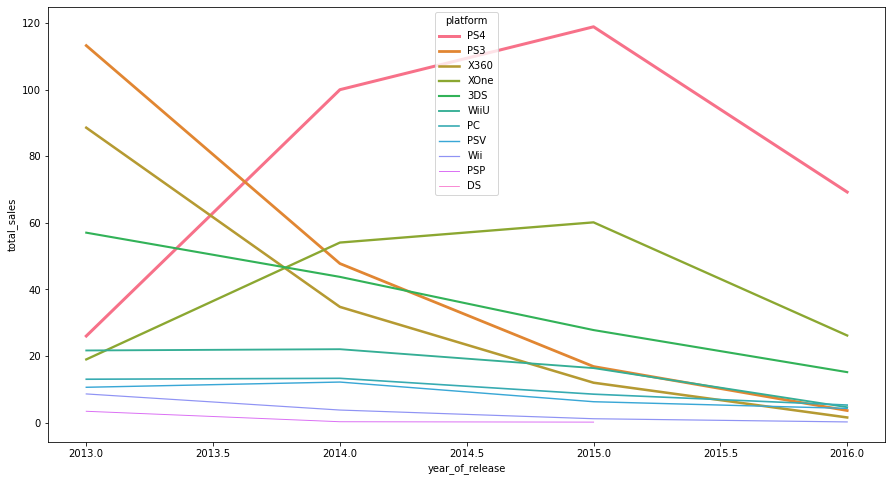

In [73]:
life_games=games_new.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')
life_games = life_games.sort_values('total_sales', ascending = False)
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=life_games, x="year_of_release", y="total_sales",hue="platform", size='platform')

Looking to the tendency of the life of the platforms, the two platforms that are projecting a growing to the future are **XOne** and **PS4**

Historically is interesting to keep in mind the platforms **X360** and **PS3** that were leading the market from 2013 and probably will have some safe traction to the future

The 3DS is a relative new platform too, but it appears having a shorter life cycle, tending to go down next years if nothing change it.

**Let's Build a box plot for the global sales of all games, broken down by platform**.

In [74]:
group_games = games_new.groupby(['platform','name'])['total_sales'].sum().reset_index()
group_games

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Frozen: Olaf's Quest,0.59
3,3DS,Haikyu!! Cross Team Match!,0.04
4,3DS,12-Sai. Honto no Kimochi,0.07
...,...,...,...
2238,XOne,XCOM 2,0.04
2239,XOne,ZombiU,0.01
2240,XOne,Zombie Army Trilogy,0.11
2241,XOne,Zoo Tycoon (2013),0.36


In [75]:
order_plot =group_games.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales')['platform']
order_plot 

1       DS
5      PSP
7      Wii
6      PSV
2       PC
8     WiiU
9     X360
0      3DS
10    XOne
3      PS3
4      PS4
Name: platform, dtype: object

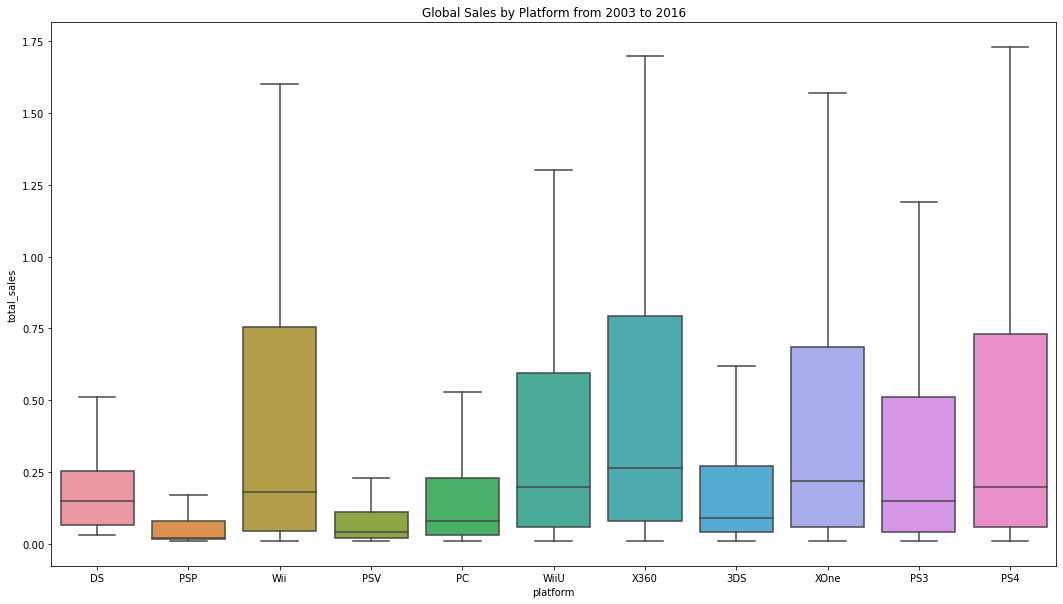

In [76]:
plt.figure(figsize=(18,10))
sns.boxplot(x='platform',y='total_sales',data=group_games,order=order_plot,showfliers = False)
plt.title('Global Sales by Platform from 2003 to 2016')
plt.show()

There is a similar set of distribution for the pair PS4 / XOne, that shows similar averages and distribuition for both platforms. Wii have a similar average, but a smaller distribution in its total sales. PS3 still have the second large total sales for the period, but the X360 is showing the higher average from all platforms 

**Let's take a look at how user and professional reviews affect sales for a particular popular platform.**

In [77]:
def score_check(platform,score):
    
    data=games_new[games_new['platform']==platform][['total_sales',score]]
    
    #Graphic
    data.plot.scatter(figsize=(5,5),  x = score, y = 'total_sales', color="c")
    plt.title(score + " reviews affecting " + platform)
    plt.xlabel(score)
    plt.ylabel("Total Sales")
    
    
    #cleaning Nan Values
    data = data[data[score].notnull()]      
    a = data[score].corr(data['total_sales'])
    
    if a>0.7:
        result = 'There is a strong correlation between the '+ score+ ' and the Global Sales for the '+ platform
        
    elif 0.7>= a > 0.3:
        result = 'There is a moderate correlation between the '+ score+ ' and the Global Sales for the '+ platform
    
    else:
        result = 'There is a weak correlation between the '+ score+ ' and the Global Sales for the '+ platform
    
    plt.show()
    print('correlation: ', a)
    print(result)
    print("")
    print('****************************************************************************************************')
    print("")

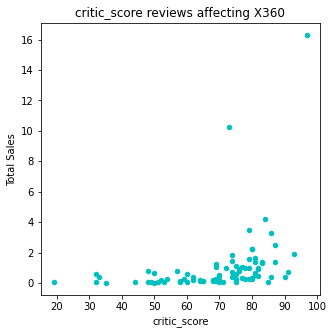

correlation:  0.35034454602286647
There is a moderate correlation between the critic_score and the Global Sales for the X360

****************************************************************************************************



In [78]:
score_check('X360','critic_score')

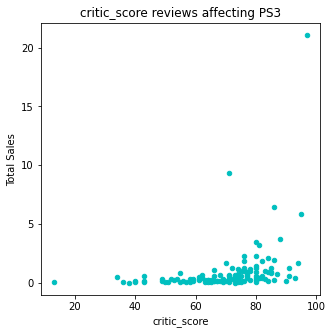

correlation:  0.33428533933719184
There is a moderate correlation between the critic_score and the Global Sales for the PS3

****************************************************************************************************



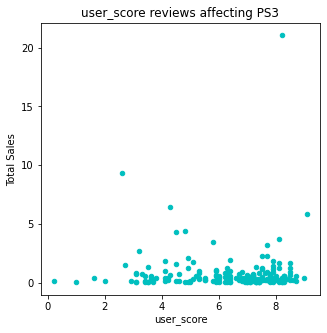

correlation:  0.0023944009618447693
There is a weak correlation between the user_score and the Global Sales for the PS3

****************************************************************************************************



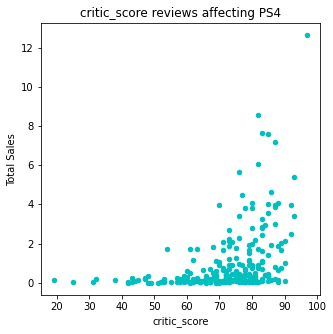

correlation:  0.4065679020617814
There is a moderate correlation between the critic_score and the Global Sales for the PS4

****************************************************************************************************



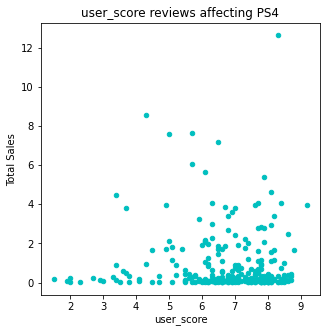

correlation:  -0.031957109005188306
There is a weak correlation between the user_score and the Global Sales for the PS4

****************************************************************************************************



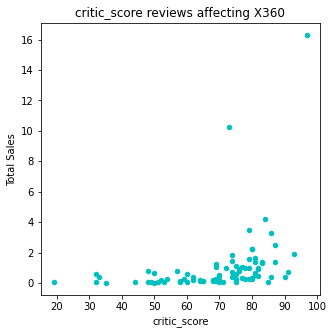

correlation:  0.35034454602286647
There is a moderate correlation between the critic_score and the Global Sales for the X360

****************************************************************************************************



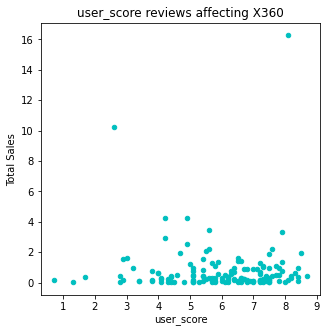

correlation:  -0.011742173023024492
There is a weak correlation between the user_score and the Global Sales for the X360

****************************************************************************************************



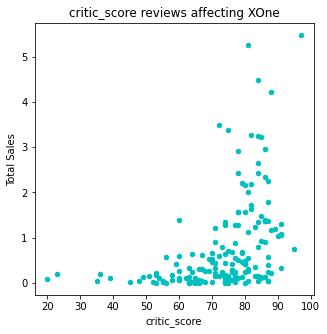

correlation:  0.4169983280084015
There is a moderate correlation between the critic_score and the Global Sales for the XOne

****************************************************************************************************



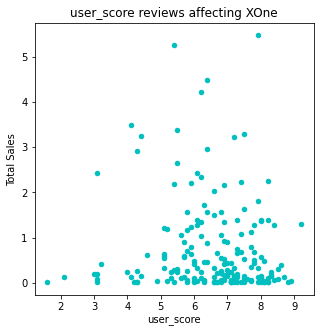

correlation:  -0.06892505319711217
There is a weak correlation between the user_score and the Global Sales for the XOne

****************************************************************************************************



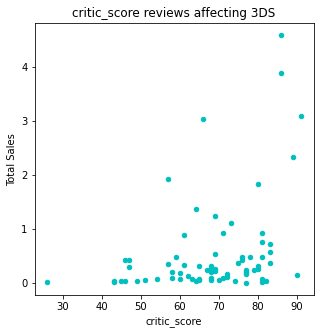

correlation:  0.3617521056996908
There is a moderate correlation between the critic_score and the Global Sales for the 3DS

****************************************************************************************************



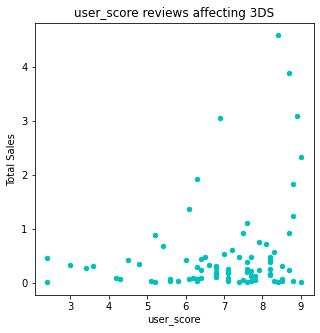

correlation:  0.250000710102376
There is a weak correlation between the user_score and the Global Sales for the 3DS

****************************************************************************************************



In [79]:
lplat = ["PS3","PS4", "X360", 'XOne', '3DS']
scores = ['critic_score', 'user_score']
for l in lplat:    
    for sc in scores:
        score_check(l, sc)

Analyzing the scores given by the users and critics on these four platforms, the pattern is the same with no influence of the user's ratings in the global sales while the opinions of the critics have a moderate influence to the revenue of these platforms.

**Now, let's compare the sales of the same games on other platforms.**

In [80]:
games_new.name.duplicated().sum()

974

In [81]:
dup_names = games_new[games_new.name.duplicated()].sort_values('name')
dup_list = dup_names.name.unique()

In [82]:
dup_complete = games_new[games_new.name.isin(dup_list)].sort_values('name')
dup_complete

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
418,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,undef,None,0.59
470,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,undef,None,0.51
406,2014 FIFA World Cup Brazil,PS3,2014.0,Sports,0.15,0.36,0.01,0.09,73.0,4.3,E,None,0.61
532,2014 FIFA World Cup Brazil,X360,2014.0,Sports,0.15,0.25,0.00,0.03,74.0,4.4,E,None,0.43
793,3rd Super Robot Wars Z Jigoku Hen,PS3,2014.0,Role-Playing,0.00,0.00,0.23,0.00,NaN,NaN,undef,None,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Zombie Army Trilogy,XOne,2015.0,Shooter,0.05,0.05,0.00,0.01,62.0,7.2,undef,None,0.11
1314,Zoo Tycoon (2013),X360,2013.0,Simulation,0.02,0.06,0.00,0.01,NaN,NaN,undef,None,0.09
602,Zoo Tycoon (2013),XOne,2013.0,Simulation,0.18,0.15,0.00,0.03,NaN,NaN,undef,None,0.36
771,Zumba Fitness: World Party,XOne,2013.0,Misc,0.17,0.05,0.00,0.02,73.0,6.2,E,None,0.24


In [83]:
len(dup_complete.name.unique())

474

In [84]:
dup_ps3 = dup_complete[dup_complete['platform']== 'PS3']
dup_ps3_names = dup_ps3['name'].unique()
dup_ps3_names
dup_not_ps3 = dup_complete[(dup_complete['platform']!= 'PS3') & (dup_complete['name'].isin(dup_ps3_names))]

In [85]:
dup_ps3_group = dup_ps3.groupby(['platform'])['total_sales'].sum().reset_index()
dup_ps3_group

,platform,total_sales
0,PS3,164.71


In [86]:
dup_not_ps3_group = dup_not_ps3.groupby(['platform'])['total_sales'].sum().reset_index().sort_values('total_sales' ,ascending = False)
dup_not_ps3_group.reset_index(drop=True)

,platform,total_sales
0,PS4,179.95
1,X360,131.29
2,XOne,82.26
3,PC,16.58
4,PSV,13.54
5,WiiU,13.26
6,Wii,13.10
7,3DS,6.89
8,PSP,0.82
9,DS,0.59


In [87]:
concat_ps3 = pd.concat([dup_ps3_group, dup_not_ps3_group], ignore_index=True)
concat_ps3

,platform,total_sales
0,PS3,164.71
1,PS4,179.95
2,X360,131.29
3,XOne,82.26
4,PC,16.58
5,PSV,13.54
6,WiiU,13.26
7,Wii,13.10
8,3DS,6.89
9,PSP,0.82


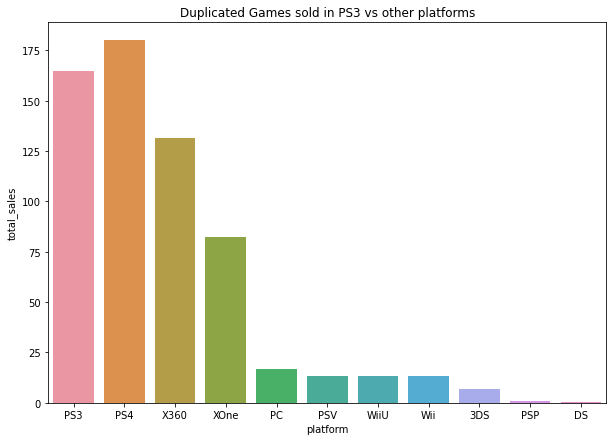

In [88]:
plt.figure(figsize=(10,7))
#sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")

ax = sns.barplot(x="platform", y="total_sales", data=concat_ps3)
ax.set(title="Duplicated Games sold in PS3 vs other platforms")
plt.show()

In [89]:
dup_x360 = dup_complete[dup_complete['platform']== 'X360']
dup_x360_names = dup_ps3['name'].unique()
dup_x360_names
dup_not_x360 = dup_complete[(dup_complete['platform']!= 'X360') & (dup_complete['name'].isin(dup_x360_names))]

In [90]:
dup_x360_group = dup_x360.groupby(['platform'])['total_sales'].sum().reset_index()
dup_x360_group

,platform,total_sales
0,X360,134.48


In [91]:
dup_not_x360_group = dup_not_x360.groupby(['platform'])['total_sales'].sum().reset_index().sort_values('total_sales' ,ascending = False)
dup_not_x360_group.reset_index(drop=True)

,platform,total_sales
0,PS4,179.95
1,PS3,164.71
2,XOne,82.26
3,PC,16.58
4,PSV,13.54
5,WiiU,13.26
6,Wii,13.10
7,3DS,6.89
8,PSP,0.82
9,DS,0.59


In [92]:
concat_x360 = pd.concat([dup_x360_group, dup_not_x360_group], ignore_index=True)
concat_x360

,platform,total_sales
0,X360,134.48
1,PS4,179.95
2,PS3,164.71
3,XOne,82.26
4,PC,16.58
5,PSV,13.54
6,WiiU,13.26
7,Wii,13.10
8,3DS,6.89
9,PSP,0.82


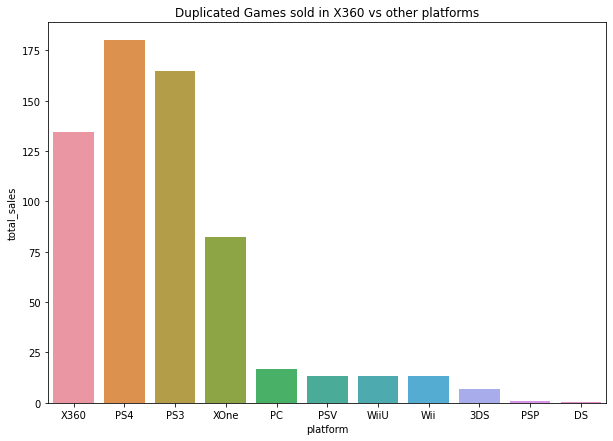

In [93]:
plt.figure(figsize=(10,7))
#sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")

ax = sns.barplot(x="platform", y="total_sales", data=concat_x360)
ax.set(title="Duplicated Games sold in X360 vs other platforms")
plt.show()

In [94]:
dup_ps4 = dup_complete[dup_complete['platform']== 'PS4']
dup_ps4_names = dup_ps4['name'].unique()
dup_ps4_names
dup_not_ps4 = dup_complete[(dup_complete['platform']!= 'PS4') & (dup_complete['name'].isin(dup_ps3_names))]

In [95]:
dup_ps4_group = dup_ps4.groupby(['platform'])['total_sales'].sum().reset_index()
dup_ps4_group

,platform,total_sales
0,PS4,279.45


In [96]:
dup_not_ps4_group = dup_not_ps4.groupby(['platform'])['total_sales'].sum().reset_index().sort_values('total_sales' ,ascending = False)
dup_not_ps4_group.reset_index(drop=True)

,platform,total_sales
0,PS3,164.71
1,X360,131.29
2,XOne,82.26
3,PC,16.58
4,PSV,13.54
5,WiiU,13.26
6,Wii,13.10
7,3DS,6.89
8,PSP,0.82
9,DS,0.59


In [97]:
concat_ps4 = pd.concat([dup_ps4_group, dup_not_ps4_group], ignore_index=True)
concat_ps4

,platform,total_sales
0,PS4,279.45
1,PS3,164.71
2,X360,131.29
3,XOne,82.26
4,PC,16.58
5,PSV,13.54
6,WiiU,13.26
7,Wii,13.10
8,3DS,6.89
9,PSP,0.82


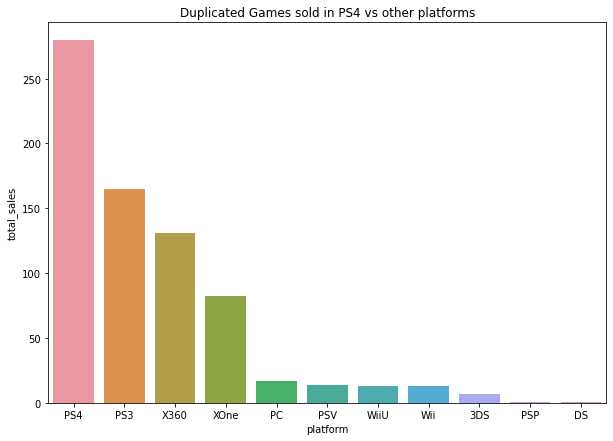

In [98]:
plt.figure(figsize=(10,7))
#sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")

ax = sns.barplot(x="platform", y="total_sales", data=concat_ps4)
ax.set(title="Duplicated Games sold in PS4 vs other platforms")
plt.show()

In [99]:
dup_xone = dup_complete[dup_complete['platform']== 'XOne']
dup_xone_names = dup_xone['name'].unique()
dup_xone_names
dup_not_xone = dup_complete[(dup_complete['platform']!= 'XOne') & (dup_complete['name'].isin(dup_ps3_names))]

In [100]:
dup_xone_group = dup_xone.groupby(['platform'])['total_sales'].sum().reset_index()
dup_xone_group

,platform,total_sales
0,XOne,135.09


In [101]:
dup_not_xone_group = dup_not_xone.groupby(['platform'])['total_sales'].sum().reset_index().sort_values('total_sales' ,ascending = False)
dup_not_xone_group.reset_index(drop=True)

,platform,total_sales
0,PS4,179.95
1,PS3,164.71
2,X360,131.29
3,PC,16.58
4,PSV,13.54
5,WiiU,13.26
6,Wii,13.10
7,3DS,6.89
8,PSP,0.82
9,DS,0.59


In [102]:
concat_xone = pd.concat([dup_xone_group, dup_not_xone_group], ignore_index=True)
concat_xone

,platform,total_sales
0,XOne,135.09
1,PS4,179.95
2,PS3,164.71
3,X360,131.29
4,PC,16.58
5,PSV,13.54
6,WiiU,13.26
7,Wii,13.10
8,3DS,6.89
9,PSP,0.82


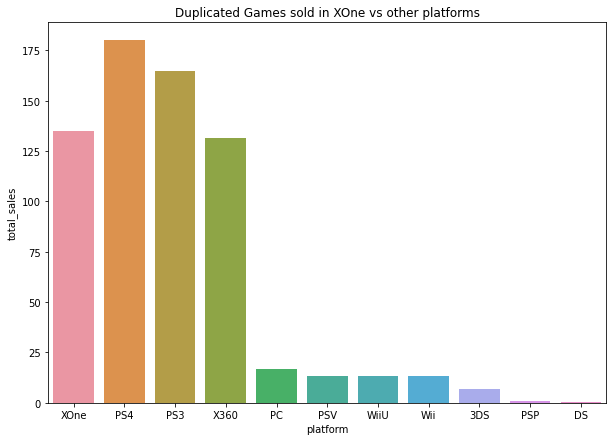

In [103]:
plt.figure(figsize=(10,7))
#sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")

ax = sns.barplot(x="platform", y="total_sales", data=concat_xone)
ax.set(title="Duplicated Games sold in XOne vs other platforms")
plt.show()

Comparing the games that are sold in more than one platform, we can confirm that the highers total sales are for PS3 and X360 in the period of 2013 to 2016. PS4 are the best seller games, followed by PS3, X360 and XOne

**Let's check the influence of the genre in the general distribution of games**

In [104]:
genre_games = games_new.groupby(['genre'])['total_sales'].agg(['sum', 'mean', 'median']).sort_values('sum', ascending = False).reset_index(drop=False)
genre_games

,genre,sum,mean,median
0,Action,322.50,0.419376,0.110
1,Shooter,233.05,1.239628,0.445
2,Sports,150.65,0.703972,0.240
3,Role-Playing,146.18,0.497211,0.125
4,Misc,63.06,0.404231,0.105
5,Platform,42.63,0.576081,0.225
6,Racing,39.98,0.464884,0.115
7,Fighting,35.31,0.441375,0.125
8,Adventure,23.73,0.096463,0.030
9,Simulation,21.95,0.348413,0.100


The most profitable genres in absolute values are the games of Action, followed by Shooter and Sports games.

But if we look of the sales average, we see that the higher mean came from shooter games, followed by  sports, platform, racing and role-playing games, all of them with higher averages than the action games, meaning that Action games earn more money in general, bot not necessarily by game sold.

The adventure, puzzle and strategy games have the lower revenue and also the lower mean in it's sales

Another observation, comparing the general mean and the median, we can see that there is some strong outliers pulling the value up. It means that some titles should represent great part of the sales within all different genres.

<a id="step4"></a>


# Step 4: Creating a user profile for each region

**The top five platforms. Describing variations in their market shares from region to region**

In [105]:
games_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,None,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,None,16.27
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undef,None,14.63
3,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undef,None,14.60
4,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,None,12.62


In [106]:
na_platform = games_new.groupby(['platform'])['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False)
na_platform_top = na_platform[na_platform['na_sales']>35].reset_index(drop=True)
na_platform_top['na_top']= [1,2,3,4,5]
na_platform_top

,platform,na_sales,na_top
0,PS4,108.74,1
1,XOne,93.12,2
2,X360,81.66,3
3,PS3,63.50,4
4,3DS,38.58,5


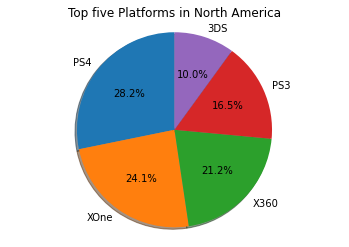

In [107]:
fig1, ax1 = plt.subplots()

ax1.pie(na_platform_top['na_sales'], labels=na_platform_top['platform'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Top five Platforms in North America')

plt.show()

In [108]:
eu_platform = games_new.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False)
eu_platform_top = eu_platform[eu_platform['eu_sales']>30].reset_index(drop=True)
eu_platform_top['eu_top']= [1,2,3,4,5]
eu_platform_top

,platform,eu_sales,eu_top
0,PS4,141.09,1
1,PS3,67.81,2
2,XOne,51.59,3
3,X360,42.52,4
4,3DS,30.98,5


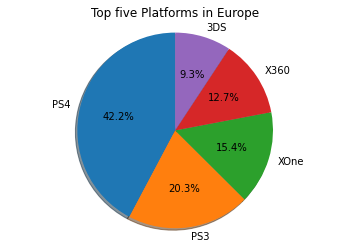

In [109]:
fig1, ax1 = plt.subplots()

ax1.pie(eu_platform_top['eu_sales'], labels=eu_platform_top['platform'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Top five Platforms in Europe')

plt.show()

In [110]:
jp_platform = games_new.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False)
jp_platform_top = jp_platform[jp_platform['jp_sales']>10].reset_index(drop=True)
jp_platform_top['jp_top']= [1,2,3,4,5]
jp_platform_top

,platform,jp_sales,jp_top
0,3DS,67.84,1
1,PS3,23.35,2
2,PSV,18.66,3
3,PS4,15.96,4
4,WiiU,10.88,5


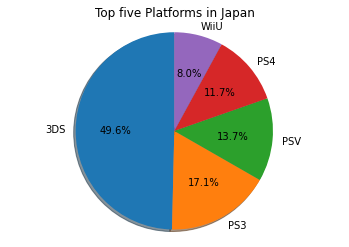

In [111]:
fig1, ax1 = plt.subplots()

ax1.pie(jp_platform_top['jp_sales'], labels=jp_platform_top['platform'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Top five Platforms in Japan')

plt.show()

In [112]:
other_platform = games_new.groupby(['platform'])['other_sales'].sum().reset_index().sort_values('other_sales', ascending=False)
other_platform_top = other_platform[other_platform['other_sales']>6].reset_index(drop=True)
other_platform_top['other_top']= [1,2,3,4,5]
other_platform_top

,platform,other_sales,other_top
0,PS4,48.35,1
1,PS3,26.77,2
2,XOne,14.27,3
3,X360,12.11,4
4,3DS,6.32,5


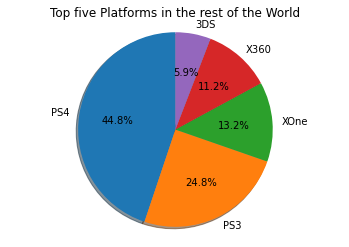

In [113]:
fig1, ax1 = plt.subplots()

ax1.pie(other_platform_top['other_sales'], labels=other_platform_top['platform'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Top five Platforms in the rest of the World')

plt.show()

In [114]:
top_plat_list = [ eu_platform_top, jp_platform_top, other_platform_top] 
world_top = na_platform_top
for t in top_plat_list:
    world_top = world_top.merge(t, how = 'outer', copy = False)
world_top

,platform,na_sales,na_top,eu_sales,eu_top,jp_sales,jp_top,other_sales,other_top
0,PS4,108.74,1.0,141.09,1.0,15.96,4.0,48.35,1.0
1,XOne,93.12,2.0,51.59,3.0,NaN,NaN,14.27,3.0
2,X360,81.66,3.0,42.52,4.0,NaN,NaN,12.11,4.0
3,PS3,63.50,4.0,67.81,2.0,23.35,2.0,26.77,2.0
4,3DS,38.58,5.0,30.98,5.0,67.84,1.0,6.32,5.0
5,PSV,NaN,NaN,NaN,NaN,18.66,3.0,NaN,NaN
6,WiiU,NaN,NaN,NaN,NaN,10.88,5.0,NaN,NaN


We can clearly see that Europe and North America are responsible for the higher sales of games in the world.

Almost the whole world (except from Japan) has PS4 is the leading platform. The other four platforms are , XOne, X360, and 3DS changing the ranking depending of the region. North America has the second place while Europe , Japan and the rest of the world have the PS3 and the rest of the world PS2

Different than the other regions, Japan has the PSV and WiiU on its  list

**The top five genres. Explaining the differences**

In [115]:
na_genre = games_new.groupby(['genre'])['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False)
na_genre_top = na_genre[na_genre['na_sales']>24].reset_index(drop=True)
na_genre_top['na_top']= [1,2,3,4,5]
na_genre_top

,genre,na_sales,na_top
0,Action,126.13,1
1,Shooter,109.78,2
2,Sports,65.27,3
3,Role-Playing,46.51,4
4,Misc,27.49,5


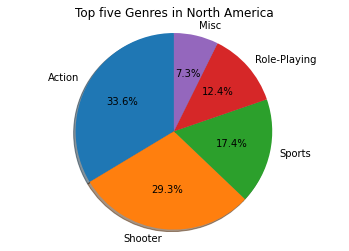

In [116]:
fig1, ax1 = plt.subplots()

ax1.pie(na_genre_top['na_sales'], labels=na_genre_top['genre'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Top five Genres in North America')

plt.show()

In [117]:
jp_genre = games_new.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False)
jp_genre_top = jp_genre[jp_genre['jp_sales']>6].reset_index(drop=True)
jp_genre_top['jp_top']= [1,2,3,4,5]
jp_genre_top

,genre,jp_sales,jp_top
0,Role-Playing,51.14,1
1,Action,40.49,2
2,Misc,9.44,3
3,Fighting,7.65,4
4,Shooter,6.61,5


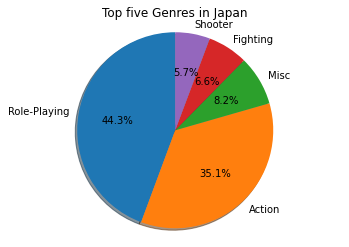

In [118]:
fig1, ax1 = plt.subplots()

ax1.pie(jp_genre_top['jp_sales'], labels=jp_genre_top['genre'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Top five Genres in Japan')

plt.show()

In [119]:
eu_genre = games_new.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False)
eu_genre_top = eu_genre[eu_genre['eu_sales']>20.05].reset_index(drop=True)
eu_genre_top['eu_top']= [1,2,3,4,5]
eu_genre_top

,genre,eu_sales,eu_top
0,Action,118.61,1
1,Shooter,87.88,2
2,Sports,60.52,3
3,Role-Playing,37.02,4
4,Racing,20.19,5


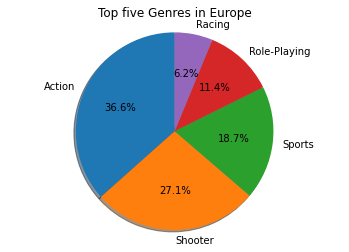

In [120]:
fig1, ax1 = plt.subplots()

ax1.pie(eu_genre_top['eu_sales'], labels=eu_genre_top['genre'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Top five Genres in Europe')

plt.show()

In [121]:
other_genre = games_new.groupby(['genre'])['other_sales'].sum().reset_index().sort_values('other_sales', ascending=False)
other_genre_top = other_genre[other_genre['other_sales']>6].reset_index(drop=True)
other_genre_top['other_top']= [1,2,3,4,5]
other_genre_top

,genre,other_sales,other_top
0,Action,37.27,1
1,Shooter,28.78,2
2,Sports,19.45,3
3,Role-Playing,11.51,4
4,Misc,6.09,5


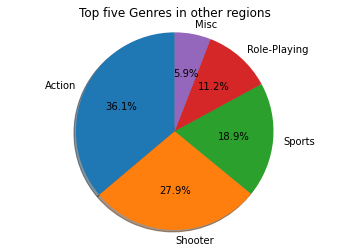

In [122]:
fig1, ax1 = plt.subplots()

ax1.pie(other_genre_top['other_sales'], labels=other_genre_top['genre'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Top five Genres in other regions')

plt.show()

In [123]:
top_gen_list = [ eu_genre_top, jp_genre_top, other_genre_top] 
worldg_top = na_genre_top
for t in top_gen_list:
    worldg_top = worldg_top.merge(t, how = 'outer', copy = False)
worldg_top

,genre,na_sales,na_top,eu_sales,eu_top,jp_sales,jp_top,other_sales,other_top
0,Action,126.13,1.0,118.61,1.0,40.49,2.0,37.27,1.0
1,Shooter,109.78,2.0,87.88,2.0,6.61,5.0,28.78,2.0
2,Sports,65.27,3.0,60.52,3.0,NaN,NaN,19.45,3.0
3,Role-Playing,46.51,4.0,37.02,4.0,51.14,1.0,11.51,4.0
4,Misc,27.49,5.0,NaN,NaN,9.44,3.0,6.09,5.0
5,Racing,NaN,NaN,20.19,5.0,NaN,NaN,NaN,NaN
6,Fighting,NaN,NaN,NaN,NaN,7.65,4.0,NaN,NaN


The top four genres in the world are the same (except in Japan - again).

The prefered genres are Action, Spots, Shooter and Role-playing games.

The role-playing is the first in sales in Japan.

There is more variety between the taste for games around the world in the fifth place. The europeans like racing, the Japanese fighting  and the rest of the world and North Ameruica prefere Miscelaneous

**Let's check if the ESRB ratings affect sales in individual regions**

In [124]:
na_rating = games_new.groupby(['rating'])['na_sales'].agg(['sum', 'mean']).reset_index().sort_values('sum', ascending=False).reset_index(drop=True)
na_rating.rename(columns={'sum': 'na_sales', 'mean': 'na_mean'}, inplace=True)
na_rating

,rating,na_sales,na_mean
0,M,165.29,0.444328
1,undef,89.42,0.091338
2,E,79.17,0.260428
3,E10+,54.32,0.214704
4,T,50.08,0.149493


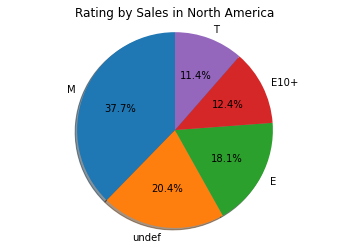

In [125]:
fig1, ax1 = plt.subplots()

ax1.pie(na_rating['na_sales'], labels=na_rating['rating'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Rating by Sales in North America')

plt.show()

In [126]:
jp_rating = games_new.groupby(['rating'])['jp_sales'].agg(['sum', 'mean']).reset_index().sort_values('sum', ascending=False).reset_index(drop=True)
jp_rating.rename(columns={'sum': 'jp_sales', 'mean': 'jp_mean'}, inplace=True)
jp_rating

,rating,jp_sales,jp_mean
0,undef,85.32,0.087150
1,T,20.66,0.061672
2,E,15.14,0.049803
3,M,14.11,0.037930
4,E10+,5.89,0.023281


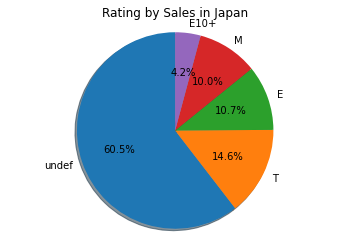

In [127]:
fig1, ax1 = plt.subplots()

ax1.pie(jp_rating['jp_sales'], labels=jp_rating['rating'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Rating by Sales in Japan')

plt.show()

In [128]:
eu_rating = games_new.groupby(['rating'])['eu_sales'].agg(['sum', 'mean']).reset_index().sort_values('sum', ascending=False).reset_index(drop=True)
eu_rating.rename(columns={'sum': 'eu_sales', 'mean': 'eu_mean'}, inplace=True)
eu_rating

,rating,eu_sales,eu_mean
0,M,145.80,0.391935
1,E,83.38,0.274276
2,undef,78.91,0.080603
3,E10+,42.69,0.168735
4,T,42.00,0.125373


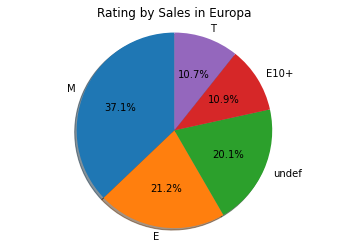

In [129]:
fig1, ax1 = plt.subplots()

ax1.pie(eu_rating['eu_sales'], labels=eu_rating['rating'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Rating by Sales in Europa')

plt.show()

In [130]:
other_rating = games_new.groupby(['rating'])['other_sales'].agg(['sum', 'mean']).reset_index().sort_values('sum', ascending=False).reset_index(drop=True)
other_rating.rename(columns={'sum': 'other_sales', 'mean': 'other_mean'}, inplace=True)
other_rating

,rating,other_sales,other_mean
0,M,47.11,0.126640
1,undef,23.46,0.023963
2,E,22.63,0.074441
3,T,14.33,0.042776
4,E10+,12.58,0.049723


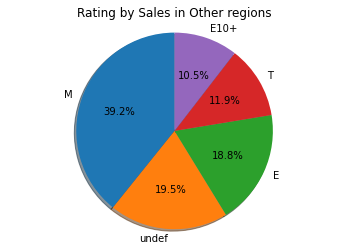

In [131]:

fig1, ax1 = plt.subplots()

ax1.pie(other_rating['other_sales'], labels=other_rating['rating'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Rating by Sales in Other regions')

plt.show()

In [132]:
rate_list = [ eu_rating, jp_rating, other_rating] 
world_rating = na_rating
for t in rate_list:
    world_rating = world_rating.merge(t, how = 'outer', copy = False)
world_rating

,rating,na_sales,na_mean,eu_sales,eu_mean,jp_sales,jp_mean,other_sales,other_mean
0,M,165.29,0.444328,145.80,0.391935,14.11,0.037930,47.11,0.126640
1,undef,89.42,0.091338,78.91,0.080603,85.32,0.087150,23.46,0.023963
2,E,79.17,0.260428,83.38,0.274276,15.14,0.049803,22.63,0.074441
3,E10+,54.32,0.214704,42.69,0.168735,5.89,0.023281,12.58,0.049723
4,T,50.08,0.149493,42.00,0.125373,20.66,0.061672,14.33,0.042776


Let's understand the ESRB rating: 
- Early Childhood (EC)
- Everyone (E)
- Everyone 10+ (E10+)
- Teen (T)
- Mature (M) for those 17 and older
- Adults Only (AO)

Looking to the absolute sales, our data is showing that the rating E is the top total sales for all the regions, and it is clear, because is the "free for all ages" of the games. The second is the Mature Games (except for Japan - again), they may contain intense violence, strong sexual content, nudity, and incessant strong language, so the vast majority of fighting, shooting games should be at this rating. The mature games are also showing a high average, so probably by known titles pulling the mean up.
In Japan the second place is for the Teens games

<a id="step5"></a>



# Step 5 - Testing the following hypotheses:

### -  Average user ratings of the Xbox One and PC platforms are the same

H0 (Null): Average user ratings of the Xbox One and PC platforms are the same

H1 (Alternative): Average user ratings of the Xbox One and PC platforms are not the same

In [133]:
xone_rate=games_new[(games_new['platform']=='XOne')& (games_new['user_score'].notnull())]
len(xone_rate)

182

In [134]:
pc_rate =games_new[(games_new['platform']=='PC')& (games_new['user_score'].notnull())]
len(pc_rate)

158

In [135]:
#making the samples with the same amount
xone_rate = xone_rate.sample(158)

The hypothesis is already our H0 , because we are looking to prove that those two populations are the same.

In [136]:
#Let's check if the sample groups have the same variance:

st.levene(xone_rate['user_score'], pc_rate['user_score'],center='mean')

LeveneResult(statistic=10.689487128010166, pvalue=0.0011970546818641848)

pvalue is smaller then alpha, test don't reject that the  dataframes have the same variances, and so we will use equal_var  = false on our Ttest

In [137]:
alpha = 0.05 
result= st.ttest_ind(xone_rate['user_score'], pc_rate['user_score'], equal_var=False)
print('p-value: ', result.pvalue)
if (result.pvalue < alpha):
    print('we reject the null hypothesis')
else:
    print("'we can't reject the null hypothesis")
    
print('XOne mean:' , xone_rate['user_score'].mean())
print('PC mean:' , pc_rate['user_score'].mean())


p-value:  0.3404199274033042
'we can't reject the null hypothesis
XOne mean: 6.449366092681885
PC mean: 6.280378818511963


### - Average user ratings for the Action and Sports genres are different.


H0 (Null): Average user ratings for the Action and Sports genres are the same.

H1 (Alternative): Average user ratings for the Action and Sports genres are different.

In [138]:
action_rate=games_new[(games_new['genre']=='Action')& (games_new['user_score'].notnull())]
len(action_rate)

392

In [139]:
sports_rate=games_new[(games_new['genre']=='Sports')& (games_new['user_score'].notnull())]
len(sports_rate)

160

In [140]:
#transforming the two samples to the same size
action_rate=action_rate.sample(160)

The hypothesis is already our H1 (alternative hypothesis) , because we are looking to prove that those two populations are  different. 

So let's check our null hypothesis - H0 - Average user ratings for the Action and Sports genres are the same.

In [141]:
#Let's check if the sample groups have the same variance:

st.levene(action_rate['user_score'], sports_rate['user_score'],center='mean')

LeveneResult(statistic=13.970582183450832, pvalue=0.0002201242552469318)

pvalue is smaller than alpha, test reject that the  dataframes have the same variances, and so we will use equal_var  = False on our Ttest

In [142]:
alpha = 0.05 
result= st.ttest_ind(action_rate['user_score'], sports_rate['user_score'], equal_var=False)
print('p-value: ', result.pvalue)
if (result.pvalue < alpha):
    print('we reject the null hypothesis')
else:
    print("'we can't reject the null hypothesis")
    
print('Action mean:' , action_rate['user_score'].mean())
print('Sports mean:' , sports_rate['user_score'].mean())


p-value:  3.5555735420242025e-16
we reject the null hypothesis
Action mean: 6.78000020980835
Sports mean: 5.238123893737793


If we reject the null hypothesis, we can't reject the alternative hypothesis, so most probably the two samples are different, but the mean of the two samples is very close.

<a id="step6"></a>



# Step 6: General conclusion

#### We have a lot to consider about what kind of games and platform to invest to create plan advertising campaigns.


Starting with the platform, almost the whole world (except from Japan) has the Top five platforms as X360, XOne, PS3, PS4 and DS changing the ranking depending of the region. North America has the top one as the X360, Europe has the PS3 and the rest of the world PS2. We can clearly see that North America and Europe are responsible for the higher sales of games in the world.

But we also saw the cycle of life to a platform, and some of these are already starting to decrease their participation on the global market.The two platforms that are projecting a growing to the future are XOne and PS4
Historically is interesting to keep in mind the platforms X360 and PS3 that were leading the market from 2013 and probably will have some safe traction to the future.

There are a similar set of distribution for PS4 / XOne, that shows similar averages and distribuition for both platforms. 

Talking about genres, the most profitables in absolute values are the games of Action, followed by Shooter and Sports  games. But if we look of the sales average, we see that the higher mean is from shooter games.

our data is showing that the rating E is the top total sales for all the regions,. The second is the Mature Games (except for Japan - again), they are also showing a high average, so probably by known titles pulling the mean up. There a lot of missing rating values, that could cause a deviation in this item. 

If the company wants to expand the acttivity to Japan, is advisable to prepare a deep study before invest in the Japanese market, because clearly the tastes about games are different from the other regions.

For the rest os the world, the conservative plan is to invest in knonw titles of action or shooting games in the platforms PS3 or X360, or to a more speculative way, to start to create space to the platforms XOne and PS4 that should replace soon the older brothers.






<a id="bonus"></a>

# Bonus - The History and Evolution of the Video Games Market

<img src="https://www.visualcapitalist.com/wp-content/uploads/2017/01/video-games-market-infographic-fin.jpg" alt="The History and Evolution of the Video Games Market" style="width:100%">